In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquakedatasetforindiansubcontinent/clead_earth_quake_data.csv


In [ ]:
df = pd.read_csv('/kaggle/input/earthquakedatasetforindiansubcontinent/clead_earth_quake_data.csv',names=["index","datetime","nearest_volcano_distance","location","latitude","longitude","magnitude","depth"],header=None)

In [ ]:
df.head()

,index,datetime,nearest_volcano_distance,location,latitude,longitude,magnitude,depth
0,NaN,Date and time,Nearest volcano (distance),Location,Latitude,Longitude,Magnitude,Depth
1,0.0,29 Dec 2010 2:03 pm (GMT +0) (29 Dec 2010 14:0...,(0 km),"West Jaintia Hills, 56 km east of Shillong, Ea...",25.575272,91.888212,4.1,4.130 km
2,1.0,12 Dec 2010 01:40:06 GMT,(0 km),"Manipur, India region",24.649936,93.810293,4.8,4.847 km
3,2.0,11 Sep 2010 07:02:09 GMT,(0 km),"Meghalaya, India region",25.500167,91.457209,4.5,4.522 km
4,3.0,10 Sep 2010 17:24:16 GMT,(0 km),Bangladesh,24.045958,90.032723,5.1,5.110 km


In [ ]:
df.shape

(311, 8)

In [ ]:
df=df.drop(0,axis=0)
df = df.set_index('index')
df.index = df.index.astype(int)

In [ ]:
def DateTimePreprocessing(s):
    
    matched = re.search(r"\(\d\d.*?\)",s)
    if matched is not None:
        date = re.search(r'\((.*?)\)',matched.group(0)).group(1)
        return datetime.strptime(date.replace(' ','-'),"%d-%b-%Y-%H:%M:%S-GMT")
    else:
        date = re.search(r'\((\d.*?)\)',s)
        if date is not None:
            
            return datetime.strptime(date.group(0).replace(' ','-'),"(%d-%b-%Y-%H:%M:%S-GMT)")
        else:
            return datetime.strptime(s.replace(' ','-'),"%d-%b-%Y-%H:%M:%S-GMT")

In [ ]:
df.datetime=df.datetime.apply(lambda s: pd.to_datetime(DateTimePreprocessing(s)))

In [ ]:
df.depth=df.depth.apply(lambda s: re.search("\d+\.\d+", s).group(0)).astype('float32')

In [ ]:
df.latitude = df.latitude.astype('float32')
df.longitude = df.longitude.astype('float32')
df.magnitude = df.magnitude.astype('float32')



df.nearest_volcano_distance=df.nearest_volcano_distance.apply(lambda s: re.search(r'\((.*?)\)',s).group(1))

In [ ]:
df.nearest_volcano_distance=df.nearest_volcano_distance.apply(lambda s: re.search("\d+", s).group(0)).astype('int')

In [ ]:
df.nearest_volcano_distance

index
0        0
1        0
2        0
3        0
4        0
      ... 
305    222
306    353
307    564
308    607
309    516
Name: nearest_volcano_distance, Length: 310, dtype: int64

In [ ]:
df.dtypes

datetime                    datetime64[ns]
nearest_volcano_distance             int64
location                            object
latitude                           float32
longitude                          float32
magnitude                          float32
depth                              float32
dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='magnitude', ylabel='datetime'>

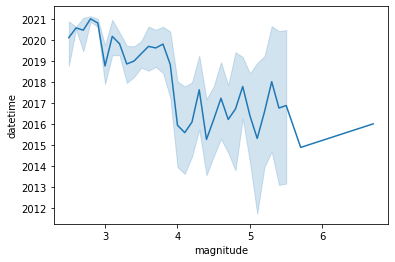

In [ ]:
sns.lineplot(data=df,y="datetime",x="magnitude")

<AxesSubplot:xlabel='datetime'>

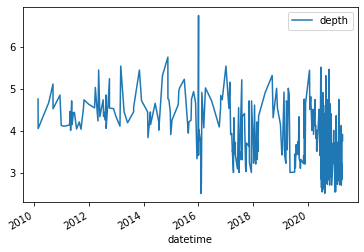

In [ ]:
df.plot(x="datetime",y="depth")

<AxesSubplot:>

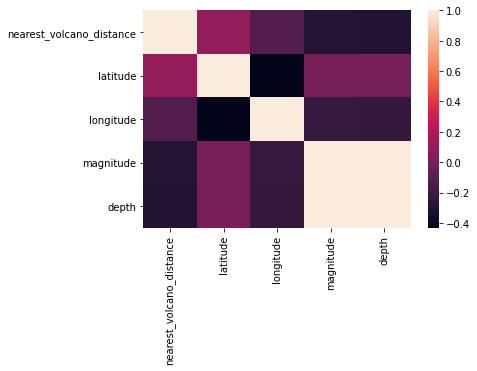

In [ ]:
sns.heatmap(df.corr())

In [ ]:
!pip install fbprophet

<AxesSubplot:xlabel='datetime'>

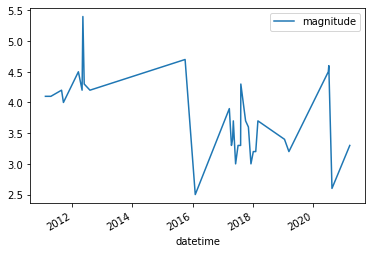

In [ ]:
p = df[df.location.duplicated()]
p.plot(x="datetime",y="magnitude")

<AxesSubplot:xlabel='magnitude', ylabel='count'>

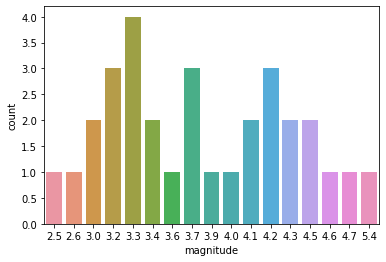

In [ ]:
sns.countplot(data=p,x="magnitude")

In [ ]:
data=df
data.datetime = data.datetime.astype('string')

# Show the earthquake time frame animation with Geoplot?

In [ ]:
import plotly.express as px

px.scatter_geo(data,lat='latitude',lon='longitude',
               scope="asia",animation_frame="datetime",
               hover_name="location",color='depth',size='magnitude')


In [ ]:
from fbprophet import Prophet

In [ ]:
data = df[['datetime','magnitude']]
data.columns = ['ds','y']

In [ ]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
670,2022-04-02 09:01:19
671,2022-04-03 09:01:19
672,2022-04-04 09:01:19
673,2022-04-05 09:01:19
674,2022-04-06 09:01:19


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
665,2022-03-28 09:01:19,3.431246,2.660655,4.286740
666,2022-03-29 09:01:19,3.387632,2.576446,4.197253
667,2022-03-30 09:01:19,3.457886,2.660823,4.264167
668,2022-03-31 09:01:19,3.426554,2.630828,4.213112
669,2022-04-01 09:01:19,3.535410,2.729733,4.333655
670,2022-04-02 09:01:19,3.390808,2.613606,4.192312
671,2022-04-03 09:01:19,3.624214,2.886022,4.448434
672,2022-04-04 09:01:19,3.546334,2.805017,4.341326
673,2022-04-05 09:01:19,3.487671,2.677471,4.261670
674,2022-04-06 09:01:19,3.541590,2.761633,4.363444


# How powerful earthquake can happen next 1 year?

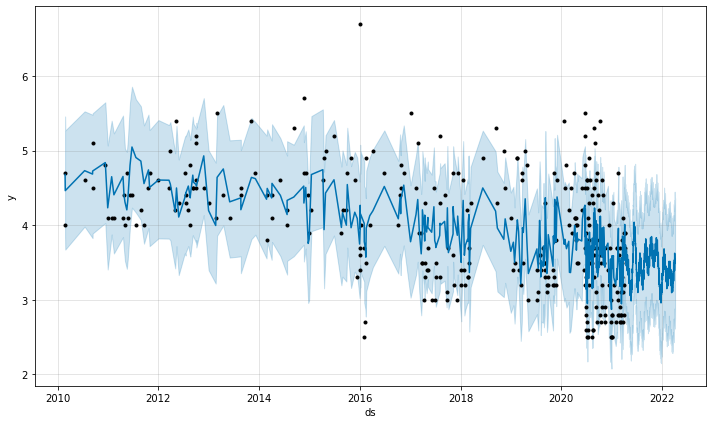

In [ ]:

solution = m.plot(forecast)


# Find the seasonality and trend of the earthquake

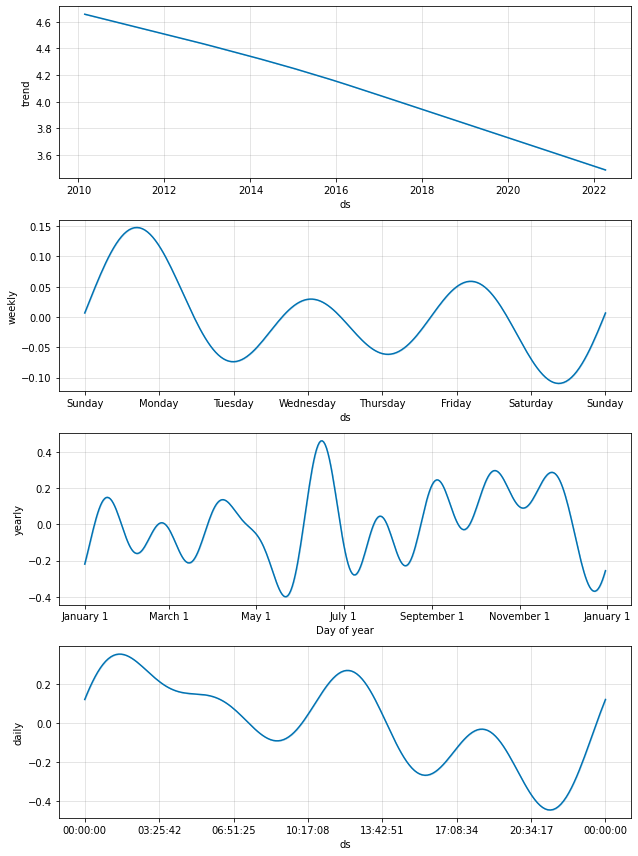

In [ ]:
solution1 = m.plot_components(forecast)
